In [1]:
#import_libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customer_data = pd.read_csv('customer_purchase_history.csv')
customer_data.head()

,S_num,Product,Feedback,Item_id,Size,User_id,Category,Size_convention,Sub_category,Us_size
0,0,romper,fit,2260466,14,420272,Women's Topwear,Num,Dresses,14
1,1,gown,fit,153475,12,273551,Women's Topwear,Num,Dresses,12
2,2,sheath,fit,1063761,4,360448,Women's Topwear,Num,Dresses,4
3,3,dress,fit,126335,8,909926,Women's Topwear,Num,Dresses,8
4,4,gown,fit,616682,12,151944,Women's Topwear,Num,Dresses,12


***Hierarchical clustering algorithms***

1. This algorithm starts with all the data points assigned to a cluster of their own.
2. Then two nearest clusters are merged into the same cluster. 
3. In the end, this algorithm terminates when there is only a single cluster left.

In [113]:
#Finding Customer with their purchase history 
df_data = pd.value_counts(customer_data['User_id']).head()
dataframe_cust = pd.DataFrame({'Customer_id':df_data.index, 'Number_of_Transcations':df_data.values})
dataframe_cust

,Customer_id,Number_of_Transcations
0,691468,435
1,32925,261
2,362951,213
3,833675,128
4,45337,125


# 5 customers

In [114]:
customer_data_01 = customer_data[(customer_data['User_id']== 691468) &  (customer_data['Size_convention']== 'Num')]
customer_data_02 = customer_data[(customer_data['User_id']== 32925) &  (customer_data['Size_convention']== 'Num')]
customer_data_03 = customer_data[(customer_data['User_id']== 362951) &  (customer_data['Size_convention']== 'Num')]
customer_data_04 = customer_data[(customer_data['User_id']== 833675) &  (customer_data['Size_convention']== 'Num')]
customer_data_05 = customer_data[(customer_data['User_id']== 45337) &  (customer_data['Size_convention']== 'Num')]

In [118]:
customer_data_append = pd.concat([customer_data_01, customer_data_02,customer_data_03,customer_data_04,customer_data_05])
customer_data_append.head()  #1123

,S_num,Product,Feedback,Item_id,Size,User_id,Category,Size_convention,Sub_category,Us_size
748,762,blazer,large,2660685,8,691468,Women's Topwear,Num,Tops & Blouses,8
1009,1025,dress,large,331370,4,691468,Women's Topwear,Num,Dresses,4
1206,1225,dress,fit,797218,8,691468,Women's Topwear,Num,Dresses,8
1382,1401,dress,large,326908,4,691468,Women's Topwear,Num,Dresses,4
1746,1769,dress,large,609338,8,691468,Women's Topwear,Num,Dresses,8


In [119]:
dictSub_category ={'Dresses':0 ,'Tops & Blouses':1}
dictFeedback = {'fit':1, 'small':0, 'large':2}
customer_data_append['Sub_category']= customer_data_append['Sub_category'].map(dictSub_category)
customer_data_append['Feedback'] = customer_data_append['Feedback'].map(dictFeedback)
dict_Size_convention = {'Num' :0, 'Alpha' :1}
customer_data_append['Size_convention'] = customer_data_append['Size_convention'].map(dict_Size_convention)

In [120]:
customer_data_append = customer_data_append.drop(['S_num', 'Product','Item_id','Size','User_id','Category','Size_convention'], axis =1)
customer_data_append.head()

,Feedback,Sub_category,Us_size
748,2,1,8
1009,2,0,4
1206,1,0,8
1382,2,0,4
1746,2,0,8


{'icoord': [[325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [295.0, 295.0, 313.75, 313.75],
  [285.0, 285.0, 304.375, 304.375],
  [275.0, 275.0, 294.6875, 294.6875],
  [265.0, 265.0, 284.84375, 284.84375],
  [255.0, 255.0, 274.921875, 274.921875],
  [245.0, 245.0, 264.9609375, 264.9609375],
  [235.0, 235.0, 254.98046875, 254.98046875],
  [225.0, 225.0, 244.990234375, 244.990234375],
  [215.0, 215.0, 234.9951171875, 234.9951171875],
  [205.0, 205.0, 224.99755859375, 224.99755859375],
  [195.0, 195.0, 214.998779296875, 214.998779296875],
  [185.0, 185.0, 204.9993896484375, 204.9993896484375],
  [175.0, 175.0, 194.99969482421875, 194.99969482421875],
  [165.0, 165.0, 184.99984741210938, 184.99984741210938],
  [155.0, 155.0, 174.9999237060547, 174.9999237060547],
  [145.0, 145.0, 164.99996185302734, 164.99996185302734],
  [135.0, 135.0, 154.99998092651367, 154.99998092651367],
  [125.0, 125.0, 144.99999046325684, 144.99999046325684],
  [115.0

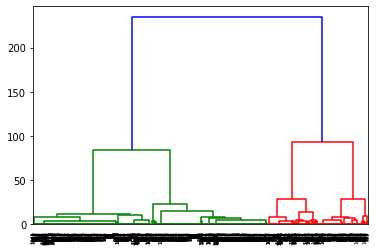

In [121]:
#import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(customer_data_append, method='ward'))
dendrogram

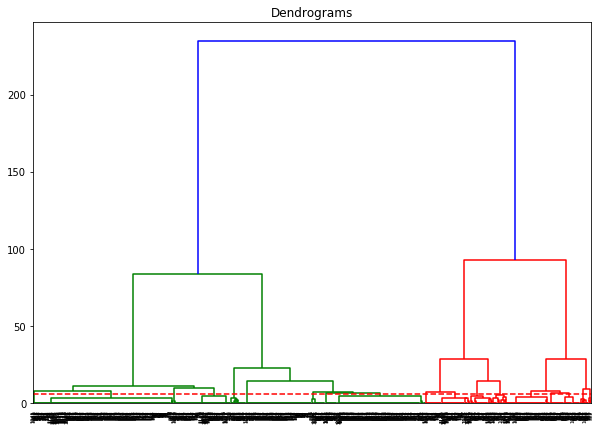

In [122]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(customer_data_append, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [125]:
#customer_data_append

In [126]:
X =customer_data_append.values
X

array([[2, 1, '8'],
       [2, 0, '4'],
       [1, 0, '8'],
       ...,
       [1, 0, '14'],
       [1, 0, '8'],
       [1, 0, '8']], dtype=object)

In [129]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
X_mean = model.fit_predict(X)
labels = model.labels_

In [131]:
customer_data_append['clusters_formed']= X_mean

In [133]:
customer_data_append['clusters_formed'].unique()

array([3, 1, 2, 0], dtype=int64)

In [132]:
customer_data_append

,Feedback,Sub_category,Us_size,clusters_formed
748,2,1,8,3
1009,2,0,4,1
1206,1,0,8,3
1382,2,0,4,1
1746,2,0,8,3
...,...,...,...,...
171501,1,0,12,2
171586,1,0,8,3
172623,1,0,14,2
175064,1,0,8,3


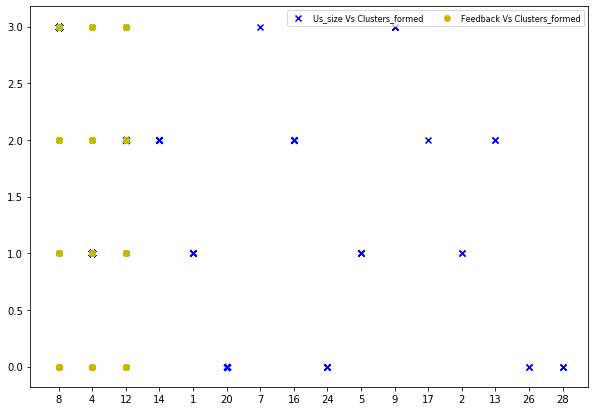

In [146]:
#https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
plt.figure(figsize=(10, 7))
colors = ['b', 'c', 'y']
ax1 = plt.scatter(customer_data_append.iloc[:,2],customer_data_append.iloc[:,3], marker='x', color=colors[0])
ax2 = plt.scatter(customer_data_append.iloc[:,0],customer_data_append.iloc[:,3], marker='o', color=colors[2])
plt.legend((ax1, ax2),
           ('Us_size Vs Clusters_formed', 'Feedback Vs Clusters_formed'),
           scatterpoints=1,
           loc='right left',
           ncol=3,
           fontsize=8)
plt.show()

In [138]:
customer_data_append[customer_data_append['clusters_formed']== 3]['Feedback'].value_counts()
#2 is large
#1 is fit
#0 is small

1    295
2     67
0     35
Name: Feedback, dtype: int64

In [139]:
customer_data_append[customer_data_append['clusters_formed']== 2]['Feedback'].value_counts()

1    111
0     48
2     22
Name: Feedback, dtype: int64

In [140]:
customer_data_append[customer_data_append['clusters_formed']== 1]['Feedback'].value_counts()

1    220
2    145
0     27
Name: Feedback, dtype: int64

In [141]:
customer_data_append[customer_data_append['clusters_formed']== 0]['Feedback'].value_counts()

1    101
2     38
0     14
Name: Feedback, dtype: int64

# One_Customer

In [156]:
customer_data_other = customer_data[(customer_data['User_id']== 699733) &  (customer_data['Size_convention']== 'Num')]
customer_data_other.head()
#691468

,S_num,Product,Feedback,Item_id,Size,User_id,Category,Size_convention,Sub_category,Us_size
3875,3947,dress,large,379930,4,699733,Women's Topwear,Num,Dresses,4
22061,22464,dress,large,742741,4,699733,Women's Topwear,Num,Dresses,4
34111,34708,top,large,2080019,4,699733,Women's Topwear,Num,Tops & Blouses,4
42858,43597,jumpsuit,fit,2688785,4,699733,Women's Topwear,Num,Dresses,4
43064,43805,top,fit,2444431,4,699733,Women's Topwear,Num,Tops & Blouses,4


In [5]:
#customer_data_unique.count()  #435

In [157]:
dict_Sub_category ={'Dresses':0 ,'Tops & Blouses':1}
dict_Feedback = {'fit':1, 'small':0, 'large':2}
customer_data_other['Sub_category']= customer_data_other['Sub_category'].map(dictSub_category)
customer_data_other['Feedback'] = customer_data_other['Feedback'].map(dictFeedback)
dict_Size_convention = {'Num' :0, 'Alpha' :1}
customer_data_other['Size_convention'] = customer_data_other['Size_convention'].map(dict_Size_convention)

In [159]:
customer_data_other = customer_data_other.drop(['S_num', 'Product','Item_id','Size','User_id','Category','Size_convention'], axis =1)
customer_data_other.head()

,Feedback,Sub_category,Us_size
3875,2,0,4
22061,2,0,4
34111,2,1,4
42858,1,0,4
43064,1,1,4


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [53.75, 53.75, 90.0, 90.0],
  [13.75, 13.75, 71.875, 71.875],
  [105.0, 105.0, 115.0, 115.0],
  [42.8125, 42.8125, 110.0, 110.0]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.224744871391589, 1.224744871391589, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.6329931618554518, 1.6329931618554518, 0.0],
  [1.224744871391589, 2.37346441585572, 2.37346441585572, 1.6329931618554518],
  [0.0, 4.0, 4.0, 0.0],
  [2.37346441585572, 32.88414004754673, 32.88414004754673, 4.0]],
 'ivl': ['2', '11', '0', '1', '9', '8', '4', '7', '3', '6', '5', '10'],
 'leaves': [2, 11, 0, 1, 9, 8, 4, 7, 3, 6, 5, 10],
 'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'b']}

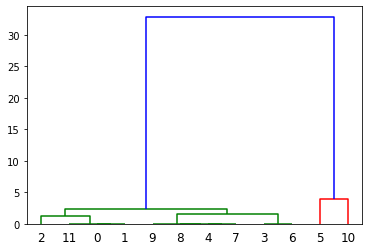

In [160]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(customer_data_other, method='ward'))
dendrogram

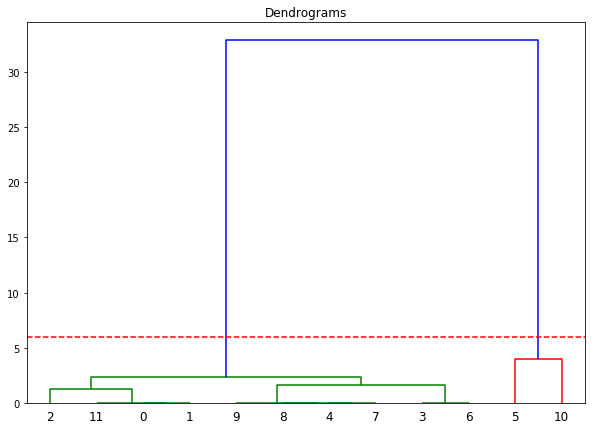

In [161]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(customer_data_other, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

#The linkage criteria refers to how the distance between clusters is calculated.


#Ward Linkage
#The distance between clusters is the sum of squared differences within all clusters

In [162]:
X =np.array(customer_data_other)
X

array([[2, 0, '4'],
       [2, 0, '4'],
       [2, 1, '4'],
       [1, 0, '4'],
       [1, 1, '4'],
       [1, 0, '24'],
       [1, 0, '4'],
       [1, 1, '4'],
       [1, 1, '4'],
       [1, 1, '4'],
       [1, 0, '20'],
       [2, 0, '4']], dtype=object)

In [163]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
X_mean = cluster.fit_predict(X)
#Number of clusters formed are 3

In [168]:
customer_data_other['clusters'].value_counts()

1    10
0     2
Name: clusters, dtype: int64

In [166]:
customer_data_other['clusters']= X_mean

In [169]:
#customer_data_unique[customer_data_unique['clusters']==0]['Us_size'].value_counts()

In [174]:
customer_data_other[customer_data_other['clusters']==1]['Us_size'].value_counts()

4    10
Name: Us_size, dtype: int64

In [172]:
customer_data_other[customer_data_other['clusters']==1]['Feedback'].value_counts()

1    6
2    4
Name: Feedback, dtype: int64

In [173]:
customer_data_other[customer_data_other['clusters']==0]['Feedback'].value_counts()

1    2
Name: Feedback, dtype: int64

In [95]:
#Cluster_2
customer_data_unique[customer_data_unique['Us_size']==str(8)]['Feedback'].value_counts()

#2 is large
#1 is fit
#0 is small

1    153
2     51
0     19
Name: Feedback, dtype: int64

In [96]:
customer_data_unique[customer_data_unique['Us_size']== str(7)]['Feedback'].value_counts()

2    1
Name: Feedback, dtype: int64

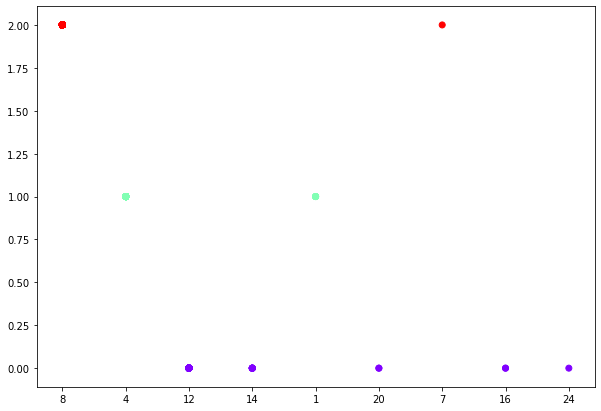

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(customer_data_unique.iloc[:,2],customer_data_unique.iloc[:,3], c=cluster.labels_, cmap='rainbow')
#plt.label

In [25]:
#plt.scatter(customer_data_unique[labels==0, 0], customer_data_unique[labels==0, 1], s=100, c='red', label ='Cluster 1')

In [26]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
#The labels_ property returns an array of integers where the values correspond to the distinct categories.

In [30]:
labels

array([2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2,

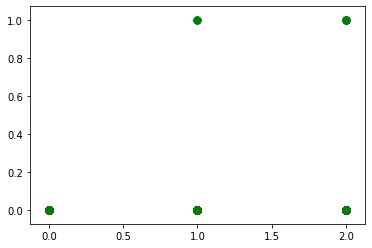

In [28]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

# Kmeans

In [74]:
customer_data_kmeans = customer_data[(customer_data['User_id']== 691468) &  (customer_data['Size_convention']== 'Num')]
customer_data_kmeans.head()
#691468

,S_num,Product,Feedback,Item_id,Size,User_id,Category,Size_convention,Sub_category,Us_size
748,762,blazer,large,2660685,8,691468,Women's Topwear,Num,Tops & Blouses,8
1009,1025,dress,large,331370,4,691468,Women's Topwear,Num,Dresses,4
1206,1225,dress,fit,797218,8,691468,Women's Topwear,Num,Dresses,8
1382,1401,dress,large,326908,4,691468,Women's Topwear,Num,Dresses,4
1746,1769,dress,large,609338,8,691468,Women's Topwear,Num,Dresses,8


In [75]:
dictSub_category ={'Dresses':0 ,'Tops & Blouses':1}
dictFeedback = {'fit':1, 'small':0, 'large':2}
customer_data_kmeans['Sub_category']= customer_data_kmeans['Sub_category'].map(dictSub_category)
customer_data_kmeans['Feedback'] = customer_data_kmeans['Feedback'].map(dictFeedback)
dict_Size_convention = {'Num' :0, 'Alpha' :1}
customer_data_kmeans['Size_convention'] = customer_data_kmeans['Size_convention'].map(dict_Size_convention)

In [76]:
customer_data_kmeans = customer_data_kmeans.drop(['S_num', 'Product','Item_id','Size','User_id','Category'], axis =1)
customer_data_kmeans.head()

,Feedback,Size_convention,Sub_category,Us_size
748,2,0,1,8
1009,2,0,0,4
1206,1,0,0,8
1382,2,0,0,4
1746,2,0,0,8


In [78]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_data_kmeans)

# statistics of scaled data
pd.DataFrame(data_scaled, columns= customer_data_kmeans.columns).describe()

#Normalisation of data
from sklearn.preprocessing import normalize
data_scaled = normalize(customer_data_kmeans)
data_scaled = pd.DataFrame(data_scaled, columns=customer_data_kmeans.columns)
data_scaled.head()

,Feedback,Size_convention,Sub_category,Us_size
0,0.240772,0.0,0.120386,0.963087
1,0.447214,0.0,0.000000,0.894427
2,0.124035,0.0,0.000000,0.992278
3,0.447214,0.0,0.000000,0.894427
4,0.242536,0.0,0.000000,0.970143


In [55]:
# importing required libraries
from sklearn.cluster import KMeans

In [79]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
# inertia on the fitted data
kmeans.inertia_

4.389271967624866

Text(0, 0.5, 'Inertia')

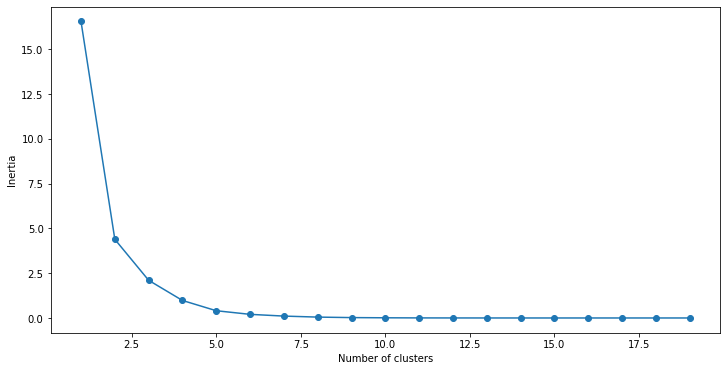

In [81]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)  
    #SSE.append(kmeans.dunn_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [101]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [102]:
#frame = pd.DataFrame(data_scaled, columns= customer_data_unique.columns)
frame['cluster'] = pred
frame

,Feedback,Sub_category,Us_size,clusters,cluster
0,0.240772,0.120386,0.963087,NaN,1
1,0.447214,0.000000,0.894427,NaN,0
2,0.124035,0.000000,0.992278,NaN,1
3,0.447214,0.000000,0.894427,NaN,0
4,0.242536,0.000000,0.970143,NaN,1
...,...,...,...,...,...
430,0.000000,0.000000,1.000000,NaN,1
431,0.242536,0.000000,0.970143,NaN,1
432,0.124035,0.000000,0.992278,NaN,1
433,0.124035,0.000000,0.992278,NaN,1


In [84]:
frame.drop(['clusters'], axis =1)

,Feedback,Sub_category,Us_size,cluster
0,0.240772,0.120386,0.963087,2
1,0.447214,0.000000,0.894427,1
2,0.124035,0.000000,0.992278,3
3,0.447214,0.000000,0.894427,1
4,0.242536,0.000000,0.970143,2
...,...,...,...,...
430,0.000000,0.000000,1.000000,0
431,0.242536,0.000000,0.970143,2
432,0.124035,0.000000,0.992278,3
433,0.124035,0.000000,0.992278,3


In [103]:
frame['cluster'].value_counts()

1    306
0    123
2      6
Name: cluster, dtype: int64

In [105]:
frame['cluster'].unique()

array([1, 0, 2])

In [110]:
frame[frame['cluster']==0]['Feedback'].value_counts()

0.447214    119
0.436436      4
Name: Feedback, dtype: int64

In [111]:
frame[frame['cluster']==1]['Feedback'].value_counts()

0.124035    151
0.242536     53
0.000000     53
0.083045     30
0.240772      4
0.164399      4
0.071247      3
0.123091      3
0.049938      2
0.235702      1
0.274721      1
0.062378      1
Name: Feedback, dtype: int64

In [176]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sil_score = silhouette_score(X, labels)

In [182]:
data_scaled

,Feedback,Size_convention,Sub_category,Us_size
0,0.240772,0.0,0.120386,0.963087
1,0.447214,0.0,0.000000,0.894427
2,0.124035,0.0,0.000000,0.992278
3,0.447214,0.0,0.000000,0.894427
4,0.242536,0.0,0.000000,0.970143
...,...,...,...,...
430,0.000000,0.0,0.000000,1.000000
431,0.242536,0.0,0.000000,0.970143
432,0.124035,0.0,0.000000,0.992278
433,0.124035,0.0,0.000000,0.992278


In [181]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    label = kmeans.labels_
    SSE.append(kmeans.inertia_) 
    sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    #SSE.append(kmeans.dunn_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
#https://www.geeksforgeeks.org/silhouette-algorithm-to-determine-the-optimal-value-of-k/?ref=rp
#http://stanford.edu/~cpiech/cs221/handouts/kmeans.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html